# Generación 5
#### Álvaro Corrochano López, Pablo Álvarez García y Antonio Fernández Martín

In [1]:
import networkx as nx
import itertools as it

In [2]:
# Importo Beautiful Soup
from bs4 import BeautifulSoup
# Importo requests para pillar el código html de donde quiera
import requests

# Cogemos la Pokédex
webDex = requests.get('https://pokemondb.net/pokedex/national')
dexSoup  = BeautifulSoup(webDex.content, 'html.parser')

In [3]:
pokedex = {}
types = [['itype', 'grass'], ['itype', 'poison'], ['itype', 'fire'], ['itype', 'flying'], ['itype', 'water'], 
         ['itype', 'bug'], ['itype', 'normal'], ['itype', 'electric'], ['itype', 'ground'], ['itype', 'fairy'], 
         ['itype', 'fighting'], ['itype', 'psychic'], ['itype', 'rock'], ['itype', 'steel'], 
         ['itype', 'ice'], ['itype', 'ghost'], ['itype', 'dark'], ['itype', 'dragon']]

for name in dexSoup.find_all('a'):
    if name.get('class') == ['ent-name']:
        pok = name.get_text()
        pokedex[pok] = {'type1' : 'None', 'type2' : 'None'}
    if name.get('class') in types:
        if pokedex[pok]['type1'] == 'None':
            pokedex[pok]['type1'] = name.get_text()
        else:
            pokedex[pok]['type2'] = name.get_text()

# 1 vs 1 Teams

In [4]:
teams = []
apariciones = {}

t1= []
 
t1.append('Dragonite')
t1.append('Slowbro')
t1.append('Volcarona')
 
teams.append(t1)
 
t2= []
 
t2.append('Scrafty')
t2.append('Raikou')
t2.append('Mew')
 
teams.append(t2)
 
t3= []
 
t3.append('Meloetta')
t3.append('Kyurem')
t3.append('Scizor')
 
teams.append(t3)
 
t4= []
 
t4.append('Dragonite')
t4.append('Suicune')
t4.append('Hydreigon')
 
teams.append(t4)

In [5]:
print(teams)

[['Dragonite', 'Slowbro', 'Volcarona'], ['Scrafty', 'Raikou', 'Mew'], ['Meloetta', 'Kyurem', 'Scizor'], ['Dragonite', 'Suicune', 'Hydreigon']]


In [6]:
G = nx.Graph()

In [7]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])

In [8]:
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

In [9]:
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Suicune', 'Hydreigon', 1)])

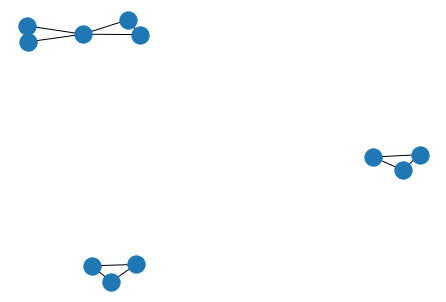

In [10]:
nx.draw(G)

# LC Teams

In [11]:
teams = []

t5= []
 
t5.append('Mienfoo')
t5.append('Frillish')
t5.append('Porygon')
t5.append('Carvanha')
t5.append('Drilbur')
t5.append('Budew')
 
teams.append(t5)
 
t6= []
 
t6.append('Larvesta')
t6.append('Carvanha')
t6.append('Staryu')
t6.append('Drilbur')
t6.append('Timburr')
t6.append('Abra')
 
teams.append(t6)
 
t7= []
 
t7.append('Tirtouga')
t7.append('Drilbur')
t7.append('Snover')
t7.append('Timburr')
t7.append('Frillish')
t7.append('Porygon')
 
teams.append(t7)
 
t8= []
 
t8.append('Omanyte')
t8.append('Tentacool')
t8.append('Hippopotas')
t8.append('Lileep')
t8.append('Drifloon')
t8.append('Vullaby')
 
teams.append(t8)
 
t9= []
 
t9.append('Aipom')
t9.append('Drilbur')
t9.append('Magnemite')
t9.append('Mienfoo')
t9.append('Ferroseed')
t9.append('Natu')
 
teams.append(t9)

In [12]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])

In [13]:
edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])

In [14]:
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Suicune', 'Hydreigon', 1), ('Mienfoo', 'Frillish', 1), ('Mienfoo', 'Porygon', 1), ('Mienfoo', 'Carvanha', 1), ('Mienfoo', 'Drilbur', 2), ('Mienfoo', 'Budew', 1), ('Mienfoo', 'Aipom', 1), ('Mienfoo', 'Magnemite', 1), ('Mienfoo', 'Ferroseed', 1), ('Mienfoo', 'Natu', 1), ('Frillish', 'Porygon', 2), ('Frillish', 'Carvanha', 1), ('Frillish', 'Drilbur', 2), ('Frillish', 'Budew', 1), ('Frillish', 'Tirtouga', 1), ('Frillish', 'Snover', 1), ('Frillish', 'Timburr', 1), ('Porygon', 'Carvanha', 1), ('Porygon', 'Drilbur', 2), ('Porygon', 'Budew', 1), ('Porygon', 'Tirtouga', 1), ('Porygon', 'Snover', 1), ('Porygon', 'Timburr', 1), ('Carvanha', 'Drilbur', 2), ('Carvanha', 'Budew', 1), ('Carv

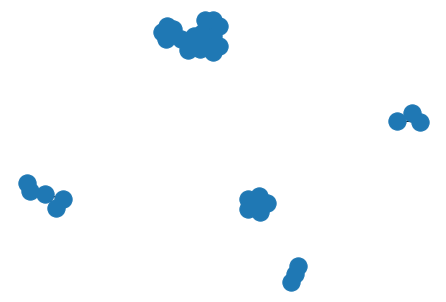

In [15]:
nx.draw(G)

# NU Teams

In [16]:
teams = []

t10= []
 
t10.append('Alomomola')
t10.append('Charizard')
t10.append('Eelektross')
t10.append('Serperior')
t10.append('Golurk')
t10.append('Skuntank')
 
teams.append(t10)
 
t11= []
 
t11.append('Swellow')
t11.append('Kangaskhan')
t11.append('Zangoose')
t11.append('Gothorita')
t11.append('Golurk')
t11.append('Rotom')
 
teams.append(t11)
 
t12= []
 
t12.append('Charizard')
t12.append('Piloswine')
t12.append('Serperior')
t12.append('Gothorita')
t12.append('Alomomola')
t12.append('Garbodor')
 
teams.append(t12)
 
t13= []
 
t13.append('Rotom')
t13.append('Gardevoir')
t13.append('Golurk')
t13.append('Alomomola')
t13.append('Garbodor')
t13.append('Kangaskhan')
 
teams.append(t13)
 
t14= []
 
t14.append('Skuntank')
t14.append('Gardevoir')
t14.append('Regirock')
t14.append('Misdreavus')
t14.append('Seismitoad')
t14.append('Braviary')
 
teams.append(t14)
 
t15= []
 
t15.append('Charizard')
t15.append('Torterra')
t15.append('Samurott')
t15.append('Piloswine')
t15.append('Fraxure')
t15.append('Musharna')
 
teams.append(t15)
 

In [17]:
print(len(teams))

6


In [18]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Suicune', 'Hydreigon', 1), ('Mienfoo', 'Frillish', 1), ('Mienfoo', 'Porygon', 1), ('Mienfoo', 'Carvanha', 1), ('Mienfoo', 'Drilbur', 2), ('Mienfoo', 'Budew', 1), ('Mienfoo', 'Aipom', 1), ('Mienfoo', 'Magnemite', 1), ('Mienfoo', 'Ferroseed', 1), ('Mienfoo', 'Natu', 1), ('Frillish', 'Porygon', 2), ('Frillish', 'Carvanha', 1), ('Frillish', 'Drilbur', 2), ('Frillish', 'Budew', 1), ('Frillish', 'Tirtouga', 1), ('Frillish', 'Snover', 1), ('Frillish', 'Timburr', 1), ('Porygon', 'Carvanha', 1), ('Porygon', 'Drilbur', 2), ('Porygon', 'Budew', 1), ('Porygon', 'Tirtouga', 1), ('Porygon', 'Snover', 1), ('Porygon', 'Timburr', 1), ('Carvanha', 'Drilbur', 2), ('Carvanha', 'Budew', 1), ('Carv

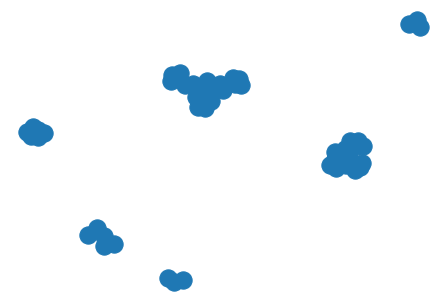

In [19]:
nx.draw(G)

# OU Teams

In [20]:
teams = []

t16= []
 
t16.append('Tyranitar')
t16.append('Keldeo')
t16.append('Heatran')
t16.append('Amoonguss')
t16.append('Landorus')
t16.append('Excadrill')
 
teams.append(t16)
 
t17= []
 
t17.append('Tyranitar')
t17.append('Latios')
t17.append('Rotom')
t17.append('Ferrothorn')
t17.append('Landorus')
t17.append('Garchomp')
 
teams.append(t17)
 
t18= []
 
t18.append('Tyranitar')
t18.append('Terrakion')
t18.append('Excadrill')
t18.append('Landorus')
t18.append('Amoonguss')
t18.append('Rotom')
 
teams.append(t18)
 
t19= []
 
t19.append('Tyranitar')
t19.append('Latios')
t19.append('Landorus')
t19.append('Ferrothorn')
t19.append('Alakazam')
t19.append('Excadrill')
 
teams.append(t19)
 
t20= []
 
t20.append('Tyranitar')
t20.append('Rotom')
t20.append('Landorus')
t20.append('Latios')
t20.append('Ferrothorn')
t20.append('Excadrill')
 
teams.append(t20)
 
t21= []
 
t21.append('Tyranitar')
t21.append('Ferrothorn')
t21.append('Landorus')
t21.append('Reuniclus')
t21.append('Latios')
t21.append('Alakazam')
 
teams.append(t21)
 
t22= []
 
t22.append('Tyranitar')
t22.append('Rotom')
t22.append('Breloom')
t22.append('Landorus')
t22.append('Latios')
t22.append('Skarmory')
 
teams.append(t22)
 
t23= []
 
t23.append('Politoed')
t23.append('Ferrothorn')
t23.append('Tentacruel')
t23.append('Latios')
t23.append('Keldeo')
t23.append('Thundurus')
 
teams.append(t23)
 
t24= []
 
t24.append('Politoed')
t24.append('Ferrothorn')
t24.append('Tentacruel')
t24.append('Dragonite')
t24.append('Keldeo')
t24.append('Thundurus')
 
teams.append(t24)
 
t25= []
 
t25.append('Politoed')
t25.append('Ferrothorn')
t25.append('Tentacruel')
t25.append('Garchomp')
t25.append('Latios')
t25.append('Tornadus')
 
teams.append(t25)
 
t26= []
 
t26.append('Politoed')
t26.append('Tentacruel')
t26.append('Celebi')
t26.append('Ferrothorn')
t26.append('Thundurus')
t26.append('Keldeo')
 
teams.append(t26)
 
t27= []
 
t27.append('Jirachi')
t27.append('Kyurem')
t27.append('Latios')
t27.append('Magnezone')
t27.append('Dragonite')
t27.append('Garchomp')
 
teams.append(t27)
 
t28= []
 
t28.append('Excadrill')
t28.append('Breloom')
t28.append('Jirachi')
t28.append('Rotom')
t28.append('Latios')
t28.append('Landorus')
 
teams.append(t28)
 
t29= []
 
t29.append('Garchomp')
t29.append('Latios')
t29.append('Dragonite')
t29.append('Starmie')
t29.append('Jirachi')
t29.append('Magnezone')
 
teams.append(t29)

In [21]:
print(len(teams))

14


In [22]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Dragonite', 'Politoed', 1), ('Dragonite', 'Ferrothorn', 1), ('Dragonite', 'Tentacruel', 1), ('Dragonite', 'Keldeo', 1), ('Dragonite', 'Thundurus', 1), ('Dragonite', 'Jirachi', 2), ('Dragonite', 'Kyurem', 1), ('Dragonite', 'Latios', 2), ('Dragonite', 'Magnezone', 2), ('Dragonite', 'Garchomp', 2), ('Dragonite', 'Starmie', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Kyurem', 'Jirachi', 1), ('Kyurem', 'Latios', 1), ('Kyurem', 'Magnezone', 1), ('Kyurem', 'Garchomp', 1), ('Suicune', 'Hydreigon', 1), ('Mienfoo', 'Frillish', 1), ('Mienfoo', 'Porygon', 1), ('Mienfoo', 'Carvanha', 1), ('Mienfoo', 'Drilbur', 2), ('Mienfoo', 'Budew', 1), ('Mienfoo', 'Aipom', 1), ('Mienfoo', 'Magnemite', 1), ('Mienfoo', 'Ferroseed', 1), ('Mien

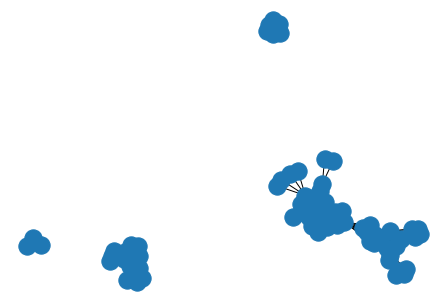

In [23]:
nx.draw(G)

# PU Teams

In [24]:
teams = []

t30= []
 
t30.append('Throh')
t30.append('Dwebble')
t30.append('Simipour')
t30.append('Klang')
t30.append('Zebstrika')
t30.append('Jumpluff')
 
teams.append(t30)
 
t31= []
 
t31.append('Maractus')
t31.append('Beheeyem')
t31.append('Mawile')
t31.append('Swanna')
t31.append('Throh')
t31.append('Banette')
 
teams.append(t31)
 
t32= []
 
t32.append('Gabite')
t32.append('Simisage')
t32.append('Beheeyem')
t32.append('Rampardos')
t32.append('Dodrio')
t32.append('Pelipper')
 
teams.append(t32)
 
t33= []
 
t33.append('Throh')
t33.append('Beheeyem')
t33.append('Zebstrika')
t33.append('Vileplume')
t33.append('Relicanth')
t33.append('Swanna')
 
teams.append(t33)

In [25]:
print(len(teams))

4


In [26]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Dragonite', 'Politoed', 1), ('Dragonite', 'Ferrothorn', 1), ('Dragonite', 'Tentacruel', 1), ('Dragonite', 'Keldeo', 1), ('Dragonite', 'Thundurus', 1), ('Dragonite', 'Jirachi', 2), ('Dragonite', 'Kyurem', 1), ('Dragonite', 'Latios', 2), ('Dragonite', 'Magnezone', 2), ('Dragonite', 'Garchomp', 2), ('Dragonite', 'Starmie', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Kyurem', 'Jirachi', 1), ('Kyurem', 'Latios', 1), ('Kyurem', 'Magnezone', 1), ('Kyurem', 'Garchomp', 1), ('Suicune', 'Hydreigon', 1), ('Mienfoo', 'Frillish', 1), ('Mienfoo', 'Porygon', 1), ('Mienfoo', 'Carvanha', 1), ('Mienfoo', 'Drilbur', 2), ('Mienfoo', 'Budew', 1), ('Mienfoo', 'Aipom', 1), ('Mienfoo', 'Magnemite', 1), ('Mienfoo', 'Ferroseed', 1), ('Mien

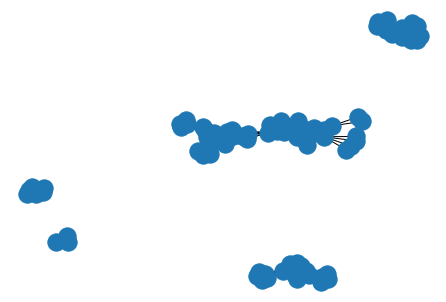

In [27]:
nx.draw(G)

# RU Teams

In [28]:
teams = []

t34= []
 
t34.append('Scolipede')
t34.append('Mesprit')
t34.append('Misdreavus')
t34.append('Omastar')
t34.append('Escavalier')
t34.append('Uxie')
 
teams.append(t34)
 
t35= []
 
t35.append('Gallade')
t35.append('Moltres')
t35.append('Durant')
t35.append('Rhydon')
t35.append('Cryogonal')
t35.append('Alomomola')
 
teams.append(t35)
 
t36= []
 
t36.append('Medicham')
t36.append('Manectric')
t36.append('Archeops')
t36.append('Uxie')
t36.append('Hitmonchan')
t36.append('Alomomola')
 
teams.append(t36)
 
t37= []
 
t37.append('Jynx')
t37.append('Haunter')
t37.append('Druddigon')
t37.append('Emboar')
t37.append('Sawsbuck')
t37.append('Kabutops')
 
teams.append(t37)
 
t38= []
 
t38.append('Spiritomb')
t38.append('Ferroseed')
t38.append('Medicham')
t38.append('Druddigon')
t38.append('Rotom')
t38.append('Cryogonal')
 
teams.append(t38)
 
t39= []
 
t39.append('Slowking')
t39.append('Spiritomb')
t39.append('Rhydon')
t39.append('Durant')
t39.append('Druddigon')
t39.append('Roselia')
 
teams.append(t39)

In [29]:
print(len(teams))

6


In [30]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Dragonite', 'Politoed', 1), ('Dragonite', 'Ferrothorn', 1), ('Dragonite', 'Tentacruel', 1), ('Dragonite', 'Keldeo', 1), ('Dragonite', 'Thundurus', 1), ('Dragonite', 'Jirachi', 2), ('Dragonite', 'Kyurem', 1), ('Dragonite', 'Latios', 2), ('Dragonite', 'Magnezone', 2), ('Dragonite', 'Garchomp', 2), ('Dragonite', 'Starmie', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Kyurem', 'Jirachi', 1), ('Kyurem', 'Latios', 1), ('Kyurem', 'Magnezone', 1), ('Kyurem', 'Garchomp', 1), ('Suicune', 'Hydreigon', 1), ('Mienfoo', 'Frillish', 1), ('Mienfoo', 'Porygon', 1), ('Mienfoo', 'Carvanha', 1), ('Mienfoo', 'Drilbur', 2), ('Mienfoo', 'Budew', 1), ('Mienfoo', 'Aipom', 1), ('Mienfoo', 'Magnemite', 1), ('Mienfoo', 'Ferroseed', 1), ('Mien

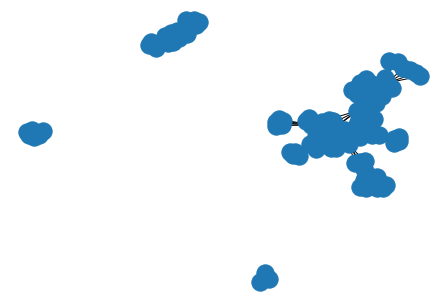

In [31]:
nx.draw(G)

# Ubers Teams

In [32]:
teams = []

t34= []
 
t34.append('Deoxys')
t34.append('Darkrai')
t34.append('Latios')
t34.append('Genesect')
t34.append('Arceus')
t34.append('Giratina')
 
teams.append(t34)
 
t35= []
 
t35.append('Deoxys')
t35.append('Giratina')
t35.append('Kyogre')
t35.append('Arceus')
t35.append('Palkia')
t35.append('Kabutops')
 
teams.append(t35)
 
t36= []
 
t36.append('Deoxys')
t36.append('Groudon')
t36.append('Latias')
t36.append('Darkrai')
t36.append('Genesect')
t36.append('Arceus')
 
teams.append(t36)
 
t37= []
 
t37.append('Excadrill')
t37.append('Arceus')
t37.append('Latias')
t37.append('Kyogre')
t37.append('Ferrothorn')
t37.append('Genesect')
 
teams.append(t37)
 
t38= []
 
t38.append('Darkrai')
t38.append('Groudon')
t38.append('Ho-oh')
t38.append('Giratina')
t38.append('Espeon')
t38.append('Arceus')
 
teams.append(t38)
 
t39= []
 
t39.append('Deoxys')
t39.append('Kyogre')
t39.append('Giratina')
t39.append('Latias')
t39.append('Genesect')
t39.append('Arceus')
 
teams.append(t39)
 
t40= []
 
t40.append('Tyranitar')
t40.append('Excadrill')
t40.append('Arceus')
t40.append('Palkia')
t40.append('Ho-oh')
t40.append('Genesect')
 
teams.append(t40)
 
t41= []
 
t41.append('Deoxys')
t41.append('Giratina')
t41.append('Kyogre')
t41.append('Ferrothorn')
t41.append('Arceus')
t41.append('Kingdra')
 
teams.append(t41)
 
t42= []
 
t42.append('Tyranitar')
t42.append('Kyogre')
t42.append('Ferrothorn')
t42.append('Arceus')
t42.append('Giratina')
t42.append('Genesect')
 
teams.append(t42)
 
t43= []
 
t43.append('Kyogre')
t43.append('Skarmory')
t43.append('Giratina')
t43.append('Dialga')
t43.append('Arceus')
t43.append('Kingdra')
 
teams.append(t43)
 
t44= []
 
t44.append('Smeargle')
t44.append('Groudon')
t44.append('Cloyster')
t44.append('Dialga')
t44.append('Kyurem')
t44.append('Arceus')
 
teams.append(t44)
 
t45= []
 
t45.append('Groudon')
t45.append('Forretress')
t45.append('Ho-oh')
t45.append('Latias')
t45.append('Arceus')
t45.append('Blaziken')
 
teams.append(t45)
 
t46= []
 
t46.append('Dialga')
t46.append('Kyogre')
t46.append('Giratina')
t46.append('Deoxys')
t46.append('Arceus')
t46.append('Genesect')
 
teams.append(t46)
 
t47= []
 
t47.append('Deoxys')
t47.append('Kyogre')
t47.append('Giratina')
t47.append('Arceus')
t47.append('Genesect')
t47.append('Palkia')
 
teams.append(t47)
 
t48= []
 
t48.append('Deoxys')
t48.append('Groudon')
t48.append('Giratina')
t48.append('Palkia')
t48.append('Arceus')
t48.append('Heatran')
 
teams.append(t48)
 
t49= []
 
t49.append('Groudon')
t49.append('Reshiram')
t49.append('Latios')
t49.append('Forretress')
t49.append('Arceus')
t49.append('Giratina')
 
teams.append(t49)
 
t50= []
 
t50.append('Lugia')
t50.append('Giratina')
t50.append('Kyogre')
t50.append('Arceus')
t50.append('Forretress')
t50.append('Jirachi')
 
teams.append(t50)
 
t51= []
 
t51.append('Gliscor')
t51.append('Tyranitar')
t51.append('Giratina')
t51.append('Arceus')
t51.append('Excadrill')
t51.append('Ferrothorn')
 
teams.append(t51)
 
t52= []
 
t52.append('Groudon')
t52.append('Heatran')
t52.append('Arceus')
t52.append('Lugia')
t52.append('Forretress')
t52.append('Giratina')
 
teams.append(t52)
 
t53= []
 
t53.append('Arceus')
t53.append('Kyogre')
t53.append('Ferrothorn')
t53.append('Tentacruel')
t53.append('Giratina')
t53.append('Lugia')
 
teams.append(t53)

In [33]:
print(len(teams))

20


In [34]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Dragonite', 'Politoed', 1), ('Dragonite', 'Ferrothorn', 1), ('Dragonite', 'Tentacruel', 1), ('Dragonite', 'Keldeo', 1), ('Dragonite', 'Thundurus', 1), ('Dragonite', 'Jirachi', 2), ('Dragonite', 'Kyurem', 1), ('Dragonite', 'Latios', 2), ('Dragonite', 'Magnezone', 2), ('Dragonite', 'Garchomp', 2), ('Dragonite', 'Starmie', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Meloetta', 'Kyurem', 1), ('Meloetta', 'Scizor', 1), ('Kyurem', 'Scizor', 1), ('Kyurem', 'Jirachi', 1), ('Kyurem', 'Latios', 1), ('Kyurem', 'Magnezone', 1), ('Kyurem', 'Garchomp', 1), ('Kyurem', 'Smeargle', 1), ('Kyurem', 'Groudon', 1), ('Kyurem', 'Cloyster', 1), ('Kyurem', 'Dialga', 1), ('Kyurem', 'Arceus', 1), ('Suicune', 'Hydreigon', 1), ('Mienfoo', 'Frillish', 1), ('Mienfoo', 'Porygon', 1), ('Mienfoo', 'Carvanha', 1), ('Mienfoo',

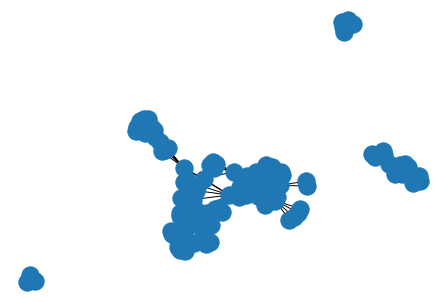

In [35]:
nx.draw(G)

# UU Teams

In [36]:
teams = []

t54= []
 
t54.append('Druddigon')
t54.append('Blastoise')
t54.append('Zapdos')
t54.append('Roserade')
t54.append('Flygon')
t54.append('Victini')
 
teams.append(t54)
 
t55= []
 
t55.append('Meloetta')
t55.append('Blastoise')
t55.append('Rhyperior')
t55.append('Victini')
t55.append('Zapdos')
t55.append('Cobalion')
 
teams.append(t55)
 
t56= []
 
t56.append('Victini')
t56.append('Blastoise')
t56.append('Nidoqueen')
t56.append('Raikou')
t56.append('Bronzong')
t56.append('Heracross')
 
teams.append(t56)
 
t57= []
 
t57.append('Golurk')
t57.append('Druddigon')
t57.append('Heracross')
t57.append('Zapdos')
t57.append('Bisharp')
t57.append('Suicune')
 
teams.append(t57)
 
t58= []
 
t58.append('Mew')
t58.append('Rhyperior')
t58.append('Qwilfish')
t58.append('Heracross')
t58.append('Togekiss')
t58.append('Umbreon')
 
teams.append(t58)
 
t59= []
 
t59.append('Zapdos')
t59.append('Slowking')
t59.append('Roserade')
t59.append('Gligar')
t59.append('Umbreon')
t59.append('Hitmontop')
 
teams.append(t59)
 
t60= []
 
t60.append('Raikou')
t60.append('Cresselia')
t60.append('Togekiss')
t60.append('Umbreon')
t60.append('Gligar')
t60.append('Blastoise')
 
teams.append(t60)
 
t61= []
 
t61.append('Mew')
t61.append('Victini')
t61.append('Tornadus')
t61.append('Suicune')
t61.append('Nidoking')
t61.append('Druddigon')
 
teams.append(t61)
 
t62= []
 
t62.append('Mew')
t62.append('Darmanitan')
t62.append('Lanturn')
t62.append('Xatu')
t62.append('Mienshao')
t62.append('Gligar')
 
teams.append(t62)

In [37]:
print(len(teams))

9


In [38]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Dragonite', 'Politoed', 1), ('Dragonite', 'Ferrothorn', 1), ('Dragonite', 'Tentacruel', 1), ('Dragonite', 'Keldeo', 1), ('Dragonite', 'Thundurus', 1), ('Dragonite', 'Jirachi', 2), ('Dragonite', 'Kyurem', 1), ('Dragonite', 'Latios', 2), ('Dragonite', 'Magnezone', 2), ('Dragonite', 'Garchomp', 2), ('Dragonite', 'Starmie', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Raikou', 'Victini', 1), ('Raikou', 'Blastoise', 2), ('Raikou', 'Nidoqueen', 1), ('Raikou', 'Bronzong', 1), ('Raikou', 'Heracross', 1), ('Raikou', 'Cresselia', 1), ('Raikou', 'Togekiss', 1), ('Raikou', 'Umbreon', 1), ('Raikou', 'Gligar', 1), ('Mew', 'Rhyperior', 1), ('Mew', 'Qwilfish', 1), ('Mew', 'Heracross', 1), ('Mew', 'Togekiss', 1), ('Mew', 'Umbreon', 1), ('Mew', 'Victini', 1), ('Mew', 'Tornadus', 1), ('Mew', 'Suicune', 1), ('Me

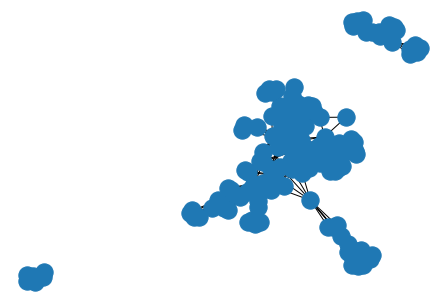

In [39]:
nx.draw(G)

# ZU Teams

In [40]:
teams = []

t63= []
 
t63.append('Simisear')
t63.append('Kingler')
t63.append('Vanilluxe')
t63.append('Exploud')
t63.append('Sandshrew')
t63.append('Kecleon')
 
teams.append(t63)
 
t64= []
 
t64.append('Octillery')
t64.append('Raticate')
t64.append('Lampent')
t64.append('Vullaby')
t64.append('Baltoy')
t64.append('Shelgon')
 
teams.append(t64)
 
t65= []
 
t65.append('Exploud')
t65.append('Gastly')
t65.append('Simisear')
t65.append('Dragonair')
t65.append('Boldore')
t65.append('Staryu')
 
teams.append(t65)
 
t66= []
 
t66.append('Onix')
t66.append('Illumise')
t66.append('Weepinbell')
t66.append('Leafeon')
t66.append('Bellossom')
t66.append('Munchlax')
 
teams.append(t66)
 
t67= []
 
t67.append('Raticate')
t67.append('Beedrill')
t67.append('Boldore')
t67.append('Emolga')
t67.append('Simisear')
t67.append('Staryu')
 
teams.append(t67)
 
t68= []
 
t68.append('Emolga')
t68.append('Clefairy')
t68.append('Sandshrew')
t68.append('Chimecho')
t68.append('Frillish')
t68.append('Beedrill')
 
teams.append(t68)

In [41]:
print(len(teams))

6


In [42]:
for team in teams:
    for pok in team:
        if(pok in apariciones):
            apariciones[pok] += 1
        else:
            apariciones[pok] = 1
        G.add_node(pok, type1 = pokedex[pok]['type1'], type2 = pokedex[pok]['type2'])
        

edgeList = []
for team in teams:
    edgeList.append([x for x in it.combinations(team, 2)])
    
for perm in edgeList :
    for pokPair in perm :
        if G.has_edge(pokPair[0], pokPair[1]):
            G[pokPair[0]][pokPair[1]]['weight'] += 1
        else:
            G.add_edge(pokPair[0], pokPair[1], weight = 1)
G.edges.data('weight')

EdgeDataView([('Dragonite', 'Slowbro', 1), ('Dragonite', 'Volcarona', 1), ('Dragonite', 'Suicune', 1), ('Dragonite', 'Hydreigon', 1), ('Dragonite', 'Politoed', 1), ('Dragonite', 'Ferrothorn', 1), ('Dragonite', 'Tentacruel', 1), ('Dragonite', 'Keldeo', 1), ('Dragonite', 'Thundurus', 1), ('Dragonite', 'Jirachi', 2), ('Dragonite', 'Kyurem', 1), ('Dragonite', 'Latios', 2), ('Dragonite', 'Magnezone', 2), ('Dragonite', 'Garchomp', 2), ('Dragonite', 'Starmie', 1), ('Slowbro', 'Volcarona', 1), ('Scrafty', 'Raikou', 1), ('Scrafty', 'Mew', 1), ('Raikou', 'Mew', 1), ('Raikou', 'Victini', 1), ('Raikou', 'Blastoise', 2), ('Raikou', 'Nidoqueen', 1), ('Raikou', 'Bronzong', 1), ('Raikou', 'Heracross', 1), ('Raikou', 'Cresselia', 1), ('Raikou', 'Togekiss', 1), ('Raikou', 'Umbreon', 1), ('Raikou', 'Gligar', 1), ('Mew', 'Rhyperior', 1), ('Mew', 'Qwilfish', 1), ('Mew', 'Heracross', 1), ('Mew', 'Togekiss', 1), ('Mew', 'Umbreon', 1), ('Mew', 'Victini', 1), ('Mew', 'Tornadus', 1), ('Mew', 'Suicune', 1), ('Me

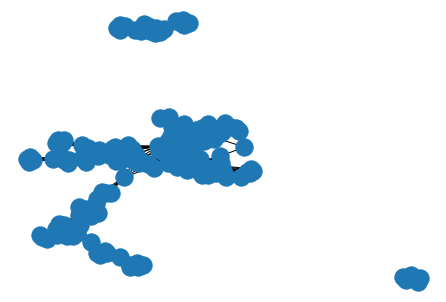

In [43]:
nx.draw(G)

In [44]:
for pok in G.nodes :
    G.nodes[pok]['teams'] = apariciones[pok]

In [45]:
nx.write_gexf(G, "Gen5Final.gexf", version="1.2draft")